# Notebook Imports and Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
%matplotlib inline



# Example 1-  A simple cost function
### $$f(x)= x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1


In [3]:
def df(x):
    return 2*x+1

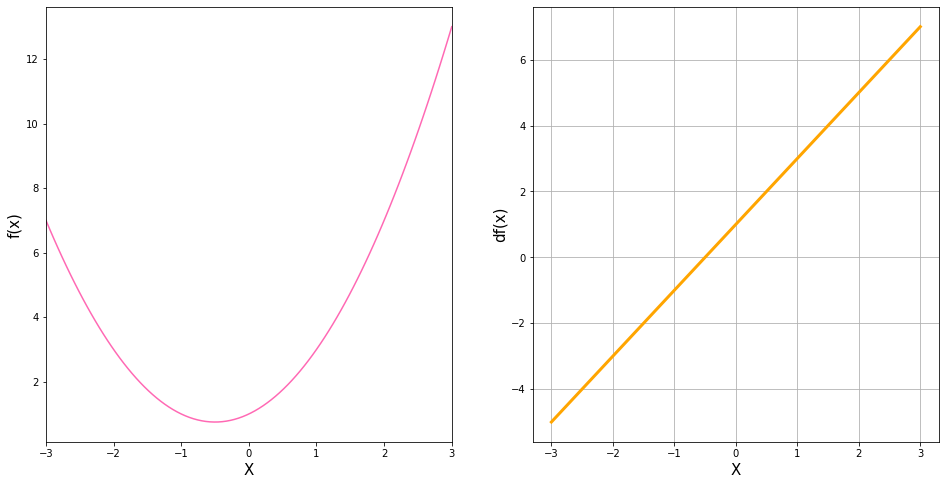

In [4]:
# Make Data
x_1=np.linspace(start=-3,stop=3,num=100)
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.plot(x_1,f(x_1),color='hotpink')
plt.xlabel('X',fontsize=15)
plt.ylabel('f(x)',fontsize=15)


plt.subplot(1,2,2)
plt.plot(x_1,df(x_1),color='orange',linewidth=3)
plt.xlabel('X',fontsize=15)
plt.ylabel('df(x)',fontsize=15)
plt.grid()


## Slope and Derivatives
$$df(x)/dx=2x+1$$

In [5]:
for n in range(5):
    print('Hello World',n)

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4


In [6]:
#Gradient Descent

new_x=3
previous_x=0
step_multiplier=0.1
ephocs=100000
precision=1e-4
count=0

x_list=[new_x]
slope_list=[df(new_x)]

for n in range(ephocs):
    previous_x=new_x
    gradient=df(previous_x)
    new_x=previous_x-step_multiplier*gradient
    count+=1
    step_size=abs(new_x-previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size<precision:
        break
print('Local minimum occurs at:',new_x)
print('slope or df(x) at this point is:',df(new_x))
print('f(x) value or cost at this point is',f(new_x))
print('steps required for converging: ',count)

Local minimum occurs at: -0.49962781616118024
slope or df(x) at this point is: 0.0007443676776395236
f(x) value or cost at this point is 0.7500001385208099
steps required for converging:  41


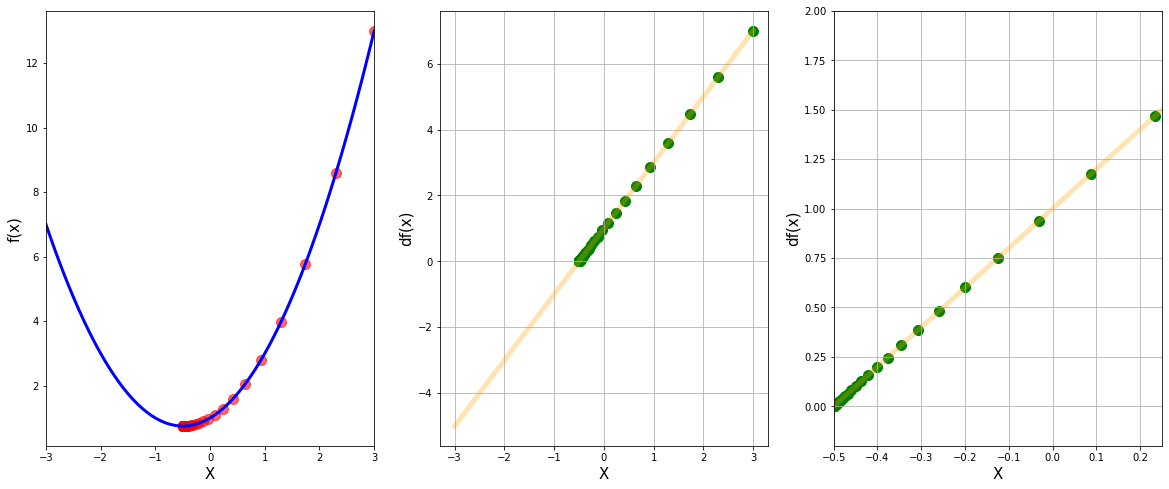

In [7]:
# Superimpose the gradient descent calculation plot funtion and derivative side by side

x_1=np.linspace(start=-3,stop=3,num=100)
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)
plt.xlabel('X',fontsize=15)
plt.ylabel('f(x)',fontsize=15)
values=np.array(x_list)
plt.scatter(x_list,f(values),color='red',alpha=0.6,s=100)


plt.subplot(1,3,2)
#plt.xlim(-1,.25)
#plt.ylim(-0.2,0.1)
plt.plot(x_1,df(x_1),color='orange',linewidth=5,alpha=0.3)
plt.xlabel('X',fontsize=15)
plt.ylabel('df(x)',fontsize=15)
plt.scatter(x_list,slope_list,color='g',s=100)
plt.grid()

#chart derivative zoomed
plt.subplot(1,3,3)
plt.xlim(-.5,.25)
plt.ylim(-0.2,2)
plt.plot(x_1,df(x_1),color='orange',linewidth=5,alpha=0.3)
plt.xlabel('X',fontsize=15)
plt.ylabel('df(x)',fontsize=15)
plt.scatter(x_list,slope_list,color='g',s=100)
plt.grid()


# Example 2 - Multiple Minima vs Initial Guess & Advance Functions

# $$ g(x)=x^4-4x^2+5$$

In [8]:
#defining function and derivative
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 -8*x


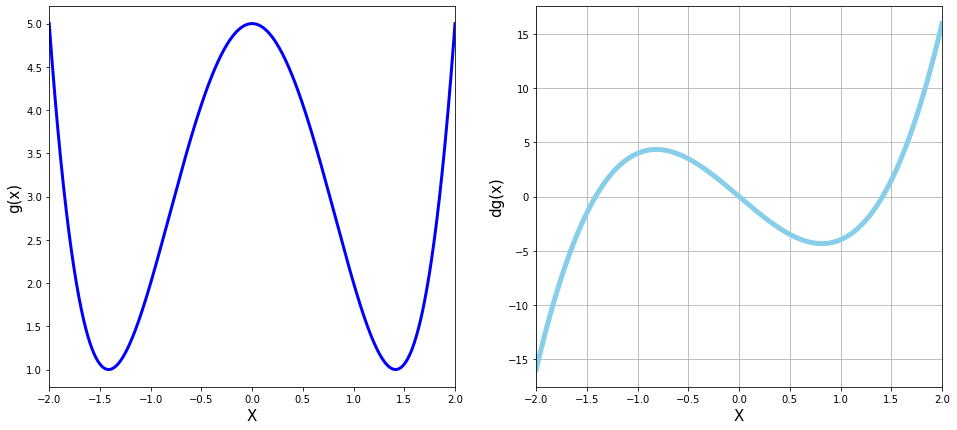

In [9]:
# Make Data
x_2=np.linspace(-2,2,1000)
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)
plt.xlabel('X',fontsize=15)
plt.ylabel('g(x)',fontsize=15)


plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)
plt.xlabel('X',fontsize=15)
plt.ylabel('dg(x)',fontsize=15)
plt.grid()


## Gradient Descent as python function

In [10]:
#Gradient Descent
def gradient_descent(derivative_funtion,initial_guess,ephocs=100,learning_rate=0.03,precision=0.001):
    new_x=initial_guess
    count=0

    x_list=[new_x]
    slope_list=[derivative_funtion(new_x)]

    for n in range(ephocs):
        previous_x=new_x
        gradient=derivative_funtion(previous_x)
        new_x=previous_x-learning_rate*gradient
        count+=1
        step_size=abs(new_x-previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_funtion(new_x))

        if step_size<precision:
            break
    return new_x,x_list,slope_list
    

In [11]:
local_min,list_x,deriv_list=gradient_descent(derivative_funtion=dg,
                                             initial_guess=-1,
                                             learning_rate=0.01,
                                             precision=1e-5)
print('local min',local_min)
print('no of steps',len(list_x))
print('g(x) at local min',g(local_min))
print('dg(x) at local min',dg(local_min))

#print(list_x)
#print(deriv_list)

local min -1.4141687750839818
no of steps 57
g(x) at local min 1.0000000160467022
dg(x) at local min 0.0007165625848983836


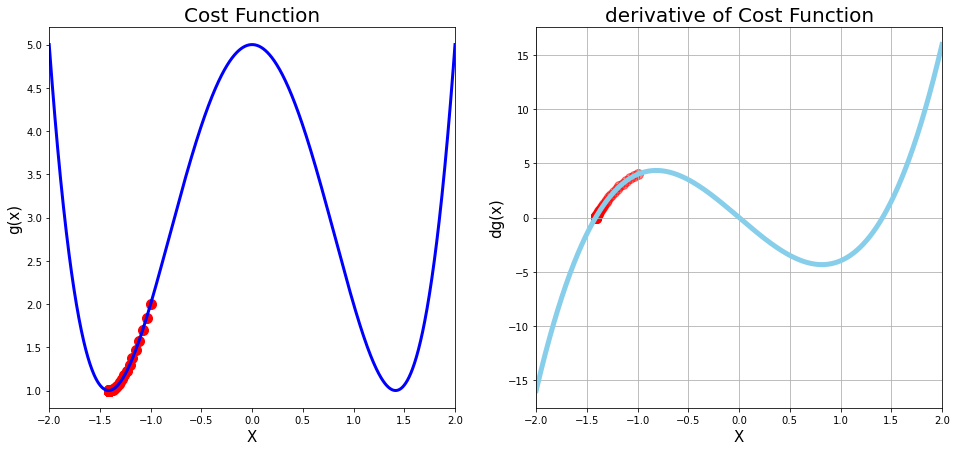

In [12]:
# calling gradient descent and ploting scater

plt.figure(figsize=(16,7))


plt.subplot(1,2,1)
plt.title('Cost Function',fontsize=20)
plt.xlim(-2,2)
plt.plot(x_2,g(x_2),color='blue',linewidth=3)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100)
plt.xlabel('X',fontsize=15)
plt.ylabel('g(x)',fontsize=15)


plt.subplot(1,2,2)
plt.title('derivative of Cost Function',fontsize=20)
plt.xlim(-2,2)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5)
plt.scatter(np.array(list_x),dg(np.array(list_x)),color='red',s=100,alpha=0.5)
plt.xlabel('X',fontsize=15)
plt.ylabel('dg(x)',fontsize=15)
plt.grid()




In [13]:
print(len(deriv_list),len(list_x))

57 57


# example 3 -Divergence, Overflow and tuples
## $$ g(x)=x^5-2x^4+2 $$

## $$ dg(x)=5x^4-8x^3 $$

In [14]:
 def h(x):
    return x**5 - 2*(x**4) + 2

def dh(x):
    return 5*(x**4) -8*(x**3)

In [15]:
import sys
sys.maxsize,(1<<63)-1



(9223372036854775807, 9223372036854775807)

# Learning Rate

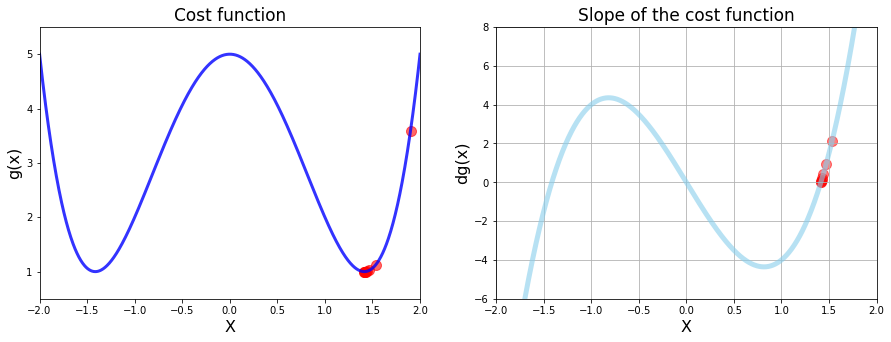

In [16]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_funtion=dg, initial_guess= 1.9,
                                                learning_rate=0.03, ephocs=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


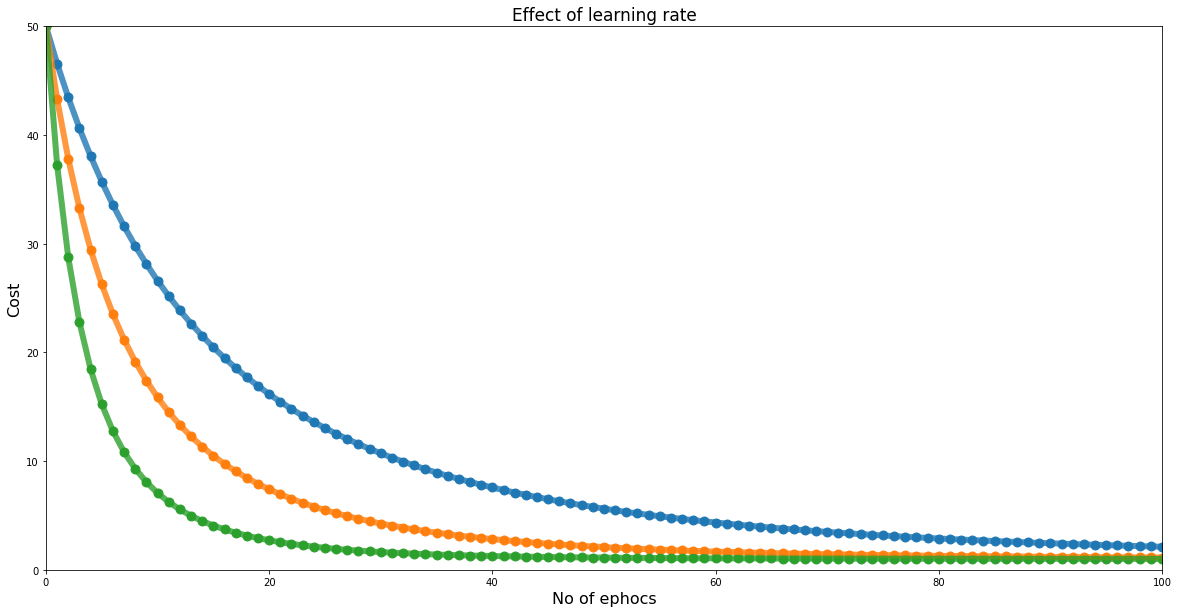

In [17]:
#run gradient descent 3 times
n=100

low_gamma = gradient_descent(derivative_funtion=dg, initial_guess= 3,
                                                learning_rate=0.0005, ephocs=100,precision=0.0001)
mid_gamma= gradient_descent(derivative_funtion=dg, initial_guess= 3,
                                                learning_rate=0.001, ephocs=100,precision=0.0001)
high_gamma = gradient_descent(derivative_funtion=dg, initial_guess= 3,
                                                learning_rate=0.002, ephocs=100,precision=0.0001)
insane_gamma = gradient_descent(derivative_funtion=dg, initial_guess= 3,
                                                learning_rate=0.2, ephocs=5,precision=0.0001)
#local_min, list_x, deriv_list



#plotting reduction in cost for each iteration

plt.figure(figsize=[20, 10])


plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of learning rate', fontsize=17)
plt.xlabel('No of ephocs', fontsize=16)
plt.ylabel('Cost', fontsize=16)


low_values=np.array(low_gamma[1])
iteration_list=list(range(0,n+1))
for x in low_gamma,mid_gamma,high_gamma:
    x_value=np.array(x[1])

    plt.plot(iteration_list, g(x_value), linewidth=6, alpha=0.8)
    plt.scatter(iteration_list,g(x_value),s=80)
plt.legend=True


# Example 4 -Data Vizualization with 3d charts
## Minimise $$ f(x,y)=\frac{1}{3^{-x^2-y^2}+1} $$

Minimise $$ f(x,y) =\frac{1}{r+1} $$ where $ r $ is $3^{-x^2-y^2}$

In [18]:
def f(x,y):
    r=3**(-x**2 -y**2)
    return 1/(r+1)

In [19]:
#make our x and y data

x_4=np.linspace(start=-2,stop=2,num=200)
y_4=np.linspace(start=-2,stop=2,num=200)

print('shape of x array',x_4.shape)

x_4,y_4=np.meshgrid(x_4,y_4)
print('Array after converting into meshgrid :',x_4.shape)



shape of x array (200,)
Array after converting into meshgrid : (200, 200)


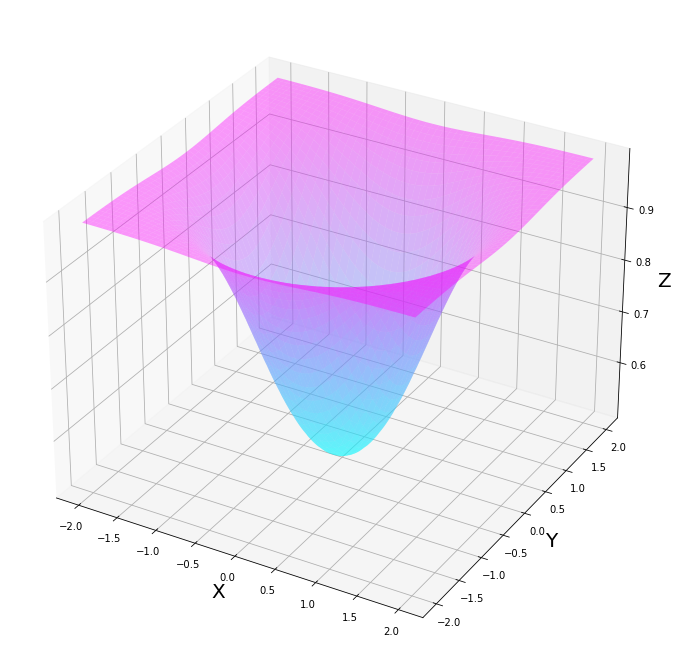

In [20]:
fig=plt.figure(figsize=(16,12))
ax=fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('Z',fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.cool,alpha=0.4)

